In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

### 1. Image I/O Functions:    ~I/O means input/output.
- imread(): Loads an image from a file.
- imwrite(): Saves an image to a file.
- imshow(): Displays an image in a window.
- imdecode(): Decodes an image from memory buffer.
- imencode(): Encodes an image to memory buffer.

In [ ]:
# Read an image
img_path = cv.imread('Ferrai1.jpeg', 1)

# Save the image to a new file
result = cv.imwrite('Ferrai1_copy.jpeg', img_path)

# Encode the image to PNG format
result, buffer = cv.imencode('.png', img_path)

# Convert the image from BGR to RGB 
img_rgb = cv.cvtColor(img_path, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

### 2. Image Processing Functions:
- resize(): Resizes an image.
- rotate(): Rotates an image by 90, 180, or 270 degrees.
- cvtColor(): Converts an image from one color space to another (e.g., BGR to RGB or grayscale).
- GaussianBlur(): Applies Gaussian blur to an image. which smoothens the image by reducing noise and detail.
- threshold(): Applies a fixed-level threshold to each pixel in the image.
- Canny(): Detects edges in an image.
- sobel(): Calculates the derivatives of an image using the Sobel operator.

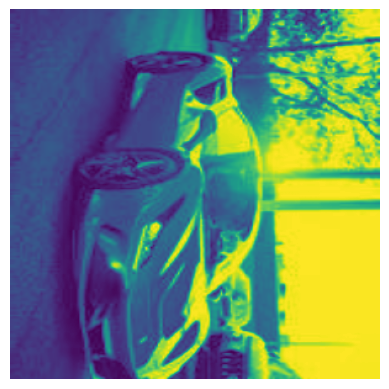

In [34]:
img_path = cv.imread('Ferrai1.jpeg', 0)
img_path = cv.resize(img_path, (300, 300), fx = 0.5, fy= 0.5)   # width to height: 400x400 pixels, and used to resize an image


img_path = cv.rotate(img_path, cv.ROTATE_90_CLOCKWISE)

img_rgb = cv.cvtColor(img_path, cv.COLOR_BGR2RGB)

cv.imwrite('road(1).jpg', img_path)


plt.imshow(img_path)
plt.axis('off')

cv.waitKey(0)
cv.destroyAllWindows()

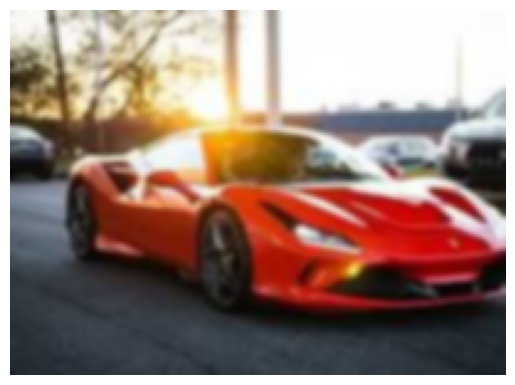

In [36]:
# Apply Gaussian Blur
# cv.GaussianBlur(src imag, ksize~(width, height), sigmaX)



img = cv.imread('Ferrai1.jpeg')


# (5, 5) is the kernel size, and 0 automatically calculates sigmaX based on the kernel size
blurred_img = cv.GaussianBlur(img, (5, 5), 0)


# Apply Gaussian Blur with a larger kernel (15x15)
blurred_img_large = cv.GaussianBlur(img, (15, 15), 0)


img_rgb = cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

# Image thresholding.

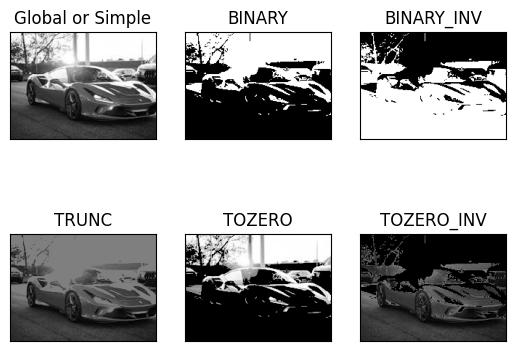

In [38]:
img = cv.imread('Ferrai1.jpeg', cv.IMREAD_GRAYSCALE)


# ret, thresholded_image = cv.threshold(src, thresh_value, max_value, threshold_type)
ret,thresh1 = cv.threshold(img, 127,255, cv.THRESH_BINARY)   # ret (short for "return") 
ret,thresh2 = cv.threshold(img, 127,255, cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img, 127,255, cv.THRESH_TRUNC) 
ret,thresh4 = cv.threshold(img, 127,255, cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img, 127,255, cv.THRESH_TOZERO_INV) 


titles = ['Original Imag','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [9]:
img_path = cv.imread('Ferrai1.jpeg', 1)
cv.imshow('image', img_path)

cv.waitKey(0)
cv.destroyAllWindows()

### Summary of Flags:
- -1 or cv2.IMREAD_COLOR: Loads the image in color format.
- 0 or cv2.IMREAD_GRAYSCALE: Loads the image in grayscale mode.
- 1 or cv2.IMREAD_UNCHANGED: Loads the image, including any alpha channel, without changing anything.

- fx=0.5: This means that the width of the image will be reduced to 50% of the original width (i.e., half the width).
- fy=0.5: This means that the height of the image will be reduced to 50% of the original height (i.e., half the height).

In [14]:
import cv2 as cv 

img_path = cv.imread('Ferrai1.jpeg', 1)
img_path = cv.resize(img_path, (300, 400), fx = 0.5, fy= 0.5)   # width to height: 400x400 pixels, and used to resize an image


cv.imshow('image', img_path)

cv.waitKey(0)
cv.destroyAllWindows()

### Image Rotation
- cv.ROTATE_90_CLOCKWISE: Rotates the image 90 degrees clockwise.
- cv.ROTATE_90_COUNTERCLOCKWISE: Rotates the image 90 degrees clockwise.
- cv.ROTATE_180: Rotates the image 180 degrees (upside-down).

🌱☀️ If I want to rotate the image as I want, then you have to use these two functions
- 1.Get the rotation matrix using: cv.getRotationMatrix2D().
-  2.Apply the rotation matrix using: cv.warpAffine().

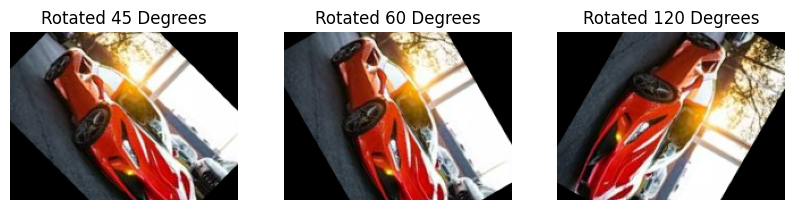

In [20]:
img = cv.imread('Ferrai1.jpeg')


(h, w) = img.shape[:2]

# Get the center of the image (rotation center)
center = (w // 2, h // 2)

# Define rotation angles
angle_45 = -45
angle_60 = -60
angle_120 = -120

# Get rotation matrices
rotation_matrix_45 = cv.getRotationMatrix2D(center, angle_45, 1.0)
rotation_matrix_60 = cv.getRotationMatrix2D(center, angle_60, 1.0)
rotation_matrix_120 = cv.getRotationMatrix2D(center, angle_120, 1.0)

# Rotate the images
rotated_45 = cv.warpAffine(img, rotation_matrix_45, (w, h))
rotated_60 = cv.warpAffine(img, rotation_matrix_60, (w, h))
rotated_120 = cv.warpAffine(img, rotation_matrix_120, (w, h))

# Convert images from BGR to RGB for displaying with matplotlib
rotated_45 = cv.cvtColor(rotated_45, cv.COLOR_BGR2RGB)
rotated_60 = cv.cvtColor(rotated_60, cv.COLOR_BGR2RGB)
rotated_120 = cv.cvtColor(rotated_120, cv.COLOR_BGR2RGB)

# Display the rotated images using matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)  # 1 row 3 coloum and 1 position
plt.imshow(rotated_45)
plt.title('Rotated 45 Degrees')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rotated_60)
plt.title('Rotated 60 Degrees')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_120)
plt.title('Rotated 120 Degrees')
plt.axis('off')

plt.show()


### 3. Object Detection:
- CascadeClassifier(): Detects objects such as faces, eyes, and cars using pre-trained classifiers.
- HoughLines(): Detects lines in an image using the Hough transform.
- HoughCircles(): Detects circles in an image using the Hough transform.